In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# --- 1. Configuration and Data Loading ---

# Define main data directories
DATA_DIR = 'ASL'
TRAIN_DIR = os.path.join(DATA_DIR, 'asl_train')
TEST_DIR = os.path.join(DATA_DIR, 'asl_test')

In [3]:
# Model and training parameters
IMG_SIZE = (64, 64)
BATCH_SIZE = 32
EPOCHS = 5
VALIDATION_SPLIT = 0.2 # Use 20% of training data for validation

# Load the training dataset from the directory
# This utility automatically infers the class labels from the subdirectory names.
train_dataset = image_dataset_from_directory(
    TRAIN_DIR,
    labels='inferred',
    label_mode='int', # Use integers for labels (for sparse_categorical_crossentropy)
    image_size=IMG_SIZE,
    interpolation='nearest',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    validation_split=VALIDATION_SPLIT,
    subset='training'
)

# Load the validation dataset from the same directory
validation_dataset = image_dataset_from_directory(
    TRAIN_DIR,
    labels='inferred',
    label_mode='int',
    image_size=IMG_SIZE,
    interpolation='nearest',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    validation_split=VALIDATION_SPLIT,
    subset='validation'
)

Found 223074 files belonging to 29 classes.
Using 178460 files for training.
Found 223074 files belonging to 29 classes.
Using 44614 files for validation.


In [4]:
# Get class names from the dataset
# These will be ['A', 'B', 'C', ..., 'Z', 'del', 'nothing', 'space']
class_names = train_dataset.class_names
num_classes = len(class_names)
print(f"Found {num_classes} classes: {class_names}")

Found 29 classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


In [5]:
# --- 2. Build the CNN Model ---

model = Sequential([
    # Input layer: Rescale pixel values from [0, 255] to [0, 1]
    Rescaling(1./255, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),

    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    # Third Convolutional Block
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    # Flatten the feature maps to a 1D vector
    Flatten(),

    # Dense layers for classification
    Dense(256, activation='relu'),
    Dropout(0.5), # Dropout for regularization to prevent overfitting
    Dense(num_classes, activation='softmax') # Output layer with softmax for multi-class classification
])

D:\CLG\python\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Print a summary of the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 29)                  │           7,453 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,198,109 (8.39 MB)

 Trainable params: 2,198,109 (8.39 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# --- 3. Train the Model ---

print("\n--- Starting Model Training ---")
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=EPOCHS
)
print("--- Model Training Finished ---\n")



--- Starting Model Training ---
Epoch 1/5
5577/5577 ━━━━━━━━━━━━━━━━━━━━ 814s 145ms/step - accuracy: 0.7350 - loss: 0.8517 - val_accuracy: 0.9568 - val_loss: 0.1590
Epoch 2/5
5577/5577 ━━━━━━━━━━━━━━━━━━━━ 806s 145ms/step - accuracy: 0.9182 - loss: 0.2517 - val_accuracy: 0.9781 - val_loss: 0.0748
Epoch 3/5
5577/5577 ━━━━━━━━━━━━━━━━━━━━ 896s 151ms/step - accuracy: 0.9441 - loss: 0.1714 - val_accuracy: 0.9852 - val_loss: 0.0505
Epoch 4/5
5577/5577 ━━━━━━━━━━━━━━━━━━━━ 852s 153ms/step - accuracy: 0.9568 - loss: 0.1340 - val_accuracy: 0.9887 - val_loss: 0.0398
Epoch 5/5
5577/5577 ━━━━━━━━━━━━━━━━━━━━ 600s 108ms/step - accuracy: 0.9643 - loss: 0.1101 - val_accuracy: 0.9889 - val_loss: 0.0368
--- Model Training Finished ---



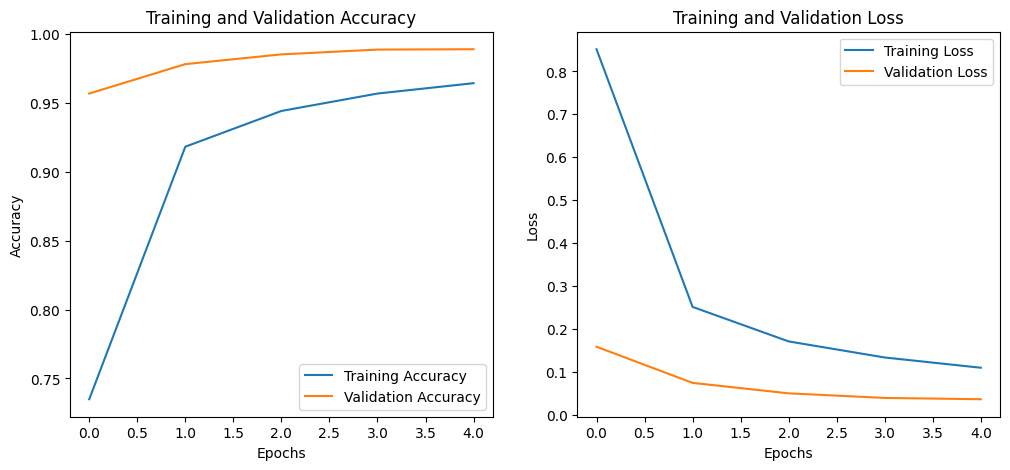

In [8]:


# --- 4. Visualize Training Results ---

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Save the plot
#plt.savefig('training_history.png')
#print("Saved training history plot to 'training_history.png'")
plt.show()


In [15]:
# --- 5. Evaluate the Model on the Test Set ---
# The test folder has random images. We will iterate through them,
# predict each one, and calculate the overall accuracy.
# We assume the filename contains the true label (e.g., 'a_test.jpg', 'b_1.jpg').
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

if not os.path.exists(TEST_DIR):
    print(f"\nWarning: Test directory not found at '{TEST_DIR}'. Skipping evaluation.")
else:
    print("\n--- Evaluating on Test Set ---")
    correct_predictions = 0
    total_test_images = 0
    
    # Map class names to integer indices for comparison
    class_indices = {name: i for i, name in enumerate(class_names)}

    test_image_files = [f for f in os.listdir(TEST_DIR) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for image_file in test_image_files:
        # The true label is assumed to be the first part of the filename
        # e.g., 'a_1.jpg' -> 'a', 'del_10.jpg' -> 'del'
        true_label_str = os.path.basename(image_file).split('_')[0].lower()
        
        # Some datasets use 'nothing' while others might use 'nothing'. Handle this.
        if true_label_str == "nothing":
            true_label_str = "nothing" # Standardize
        elif true_label_str == "del":
             true_label_str = "del" # Standardize
        elif true_label_str == "space":
             true_label_str = "space" # Standardize
        
        if true_label_str not in class_indices:
            print(f"Warning: Skipping image '{image_file}' with unknown label '{true_label_str}'")
            continue

        true_label = class_indices[true_label_str]
        total_test_images += 1

        # Load and preprocess the image
        img_path = os.path.join(TEST_DIR, image_file)
        img = tf.keras.utils.load_img(img_path, target_size=IMG_SIZE)
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0) # Create a batch

        # Make a prediction
        predictions = model.predict(img_array, verbose=0)
        predicted_class_index = np.argmax(predictions[0])
        
        if predicted_class_index == true_label:
            correct_predictions += 1

    if total_test_images > 0:
        test_accuracy = (correct_predictions / total_test_images) * 100
        print(f"Test Accuracy: {test_accuracy:.2f}%")
        print(f"Correctly predicted {correct_predictions} out of {total_test_images} test images.")

         # 1. Classification Report
        print("\n--- Classification Report ---")
        # Use target_names to map integer labels back to string names
        print(classification_report(y_true, y_pred, target_names=class_names))

        # 2. Confusion Matrix Heatmap
        print("\n--- Generating Confusion Matrix Heatmap ---")
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(18, 15))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=class_names, yticklabels=class_names)
        plt.title('Confusion Matrix', fontsize=20)
        plt.ylabel('Actual Label', fontsize=15)
        plt.xlabel('Predicted Label', fontsize=15)
        plt.show()
        
    else:
        print("No valid test images found to evaluate.")



--- Evaluating on Test Set ---
Test Accuracy: 100.00%
Correctly predicted 2 out of 2 test images.

--- Classification Report ---


NameError: name 'y_true' is not defined

# --- 6. Predict on a Specific Image ---

# --- EDIT THIS LINE to the path of the image you want to predict ---
image_to_predict = 'a_2.jpeg' # Example path

# Check if the specified image file exists
if not os.path.exists(image_to_predict):
    print(f"\nError: The image file was not found at '{image_to_predict}'")
    print("Please update the 'image_to_predict' variable with the correct path.")
else:
    print(f"\n--- Predicting on Specific Image: {os.path.basename(image_to_predict)} ---")

    # Load and preprocess the image
    img = tf.keras.utils.load_img(image_to_predict, target_size=IMG_SIZE)
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions[0])
    predicted_class = class_names[predicted_index]
    confidence = 100 * np.max(predictions[0])

    print(f"Predicted Sign: {predicted_class}")
    print(f"Confidence: {confidence:.2f}%")

    # Display the image with the prediction
    plt.figure()
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

In [14]:
# --- 6. Real-time Webcam Hand Sign Detection ---
import cv2

print("\n--- Starting Webcam for Real-time Detection ---")
print("Place your hand inside the green box.")
print("Press 'q' to quit the webcam window.")

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

# --- NEW: Define the Region of Interest (ROI) box ---
# Box dimensions (300x300 pixels)
box_size = 300
# Get frame dimensions to calculate the box position
ret, frame = cap.read()
if not ret:
    print("Error: Can't read initial frame.")
    exit()
height, width, _ = frame.shape

# Top-left corner of the box
x1 = int((width - box_size) / 2)
y1 = int((height - box_size) / 2)
# Bottom-right corner of the box
x2 = x1 + box_size
y2 = y1 + box_size


while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Can't receive frame. Exiting ...")
        break

    frame = cv2.flip(frame, 1)

    # --- NEW: Extract the ROI ---
    # Create the ROI from the original frame based on the calculated coordinates
    roi = frame[y1:y2, x1:x2]

    # --- Preprocess the ROI for the model ---
    # The model expects an RGB image
    rgb_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    
    # Resize the ROI to the model's expected input size
    resized_roi = cv2.resize(rgb_roi, IMG_SIZE)
    
    # Convert to a NumPy array and add a batch dimension
    img_array = tf.keras.utils.img_to_array(resized_roi)
    img_array = tf.expand_dims(img_array, 0)

    # --- Make a prediction on the ROI ---
    predictions = model.predict(img_array, verbose=0)
    predicted_index = np.argmax(predictions[0])
    predicted_class = class_names[predicted_index]
    confidence = 100 * np.max(predictions[0])

    # --- Display the prediction and the ROI box on the original frame ---
    display_text = f"Prediction: {predicted_class} ({confidence:.1f}%)"
    cv2.putText(frame, display_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    
    # --- NEW: Draw the ROI box on the frame ---
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2) # Green box with thickness 2

    # Display the resulting frame
    cv2.imshow('ASL Hand Sign Detection (Press Q to Quit)', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
print("--- Webcam feed closed ---")


--- Starting Webcam for Real-time Detection ---
Place your hand inside the green box.
Press 'q' to quit the webcam window.
--- Webcam feed closed ---
